<a href="https://colab.research.google.com/github/priyanshu3042/Level-2-Task-2/blob/main/Level%202%20Task%202.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()


Saving Dataset .csv to Dataset .csv


✅ Most common price range: 1

📊 Average rating for each price range:
price_range
4    3.817918
3    3.683381
2    2.941054
1    1.999887
Name: rating, dtype: float64


/tmp/ipython-input-2-2426487343.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_rating_per_price.index, y=avg_rating_per_price.values, palette=colors)


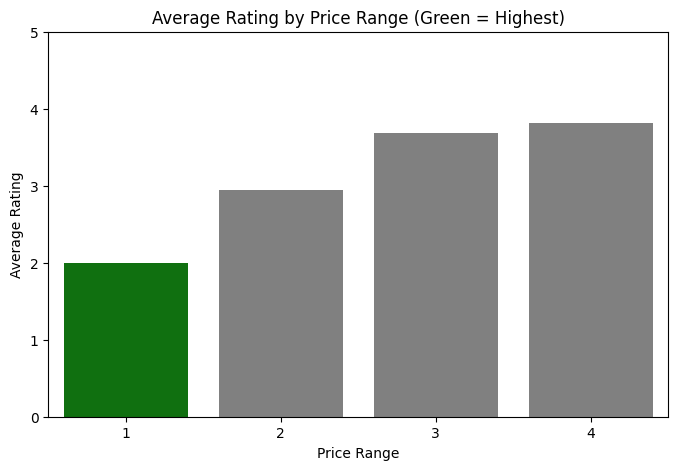

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("Dataset .csv")
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

# Standardize column names
df.rename(columns={'aggregate_rating': 'rating'}, inplace=True)

# Convert price_range and rating to numeric
df['price_range'] = pd.to_numeric(df['price_range'], errors='coerce')
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

# -------------------------------
# 1. Most common price range
# -------------------------------
most_common_price = df['price_range'].mode()[0]
print(f"✅ Most common price range: {most_common_price}")

# -------------------------------
# 2. Average rating for each price range
# -------------------------------
avg_rating_per_price = df.groupby('price_range')['rating'].mean().sort_values(ascending=False)
print("\n📊 Average rating for each price range:")
print(avg_rating_per_price)

# -------------------------------
# 3. Bar plot with color for highest rating
# -------------------------------
colors = ['gray'] * len(avg_rating_per_price)
highest_index = avg_rating_per_price.idxmax()
highest_position = avg_rating_per_price.index.get_loc(highest_index)
colors[highest_position] = 'green'  # Use green to highlight highest

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x=avg_rating_per_price.index, y=avg_rating_per_price.values, palette=colors)
plt.xlabel('Price Range')
plt.ylabel('Average Rating')
plt.title('Average Rating by Price Range (Green = Highest)')
plt.ylim(0, 5)
plt.show()
